# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sinasc = pd.read_csv('SINASC_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [10]:
# Categorizando a variável APGAR5 com o método cut()
sinasc['APGAR5_categoria'] = pd.cut(sinasc['APGAR5'],
                                    bins=[0, 3, 5, 7, 10],
                                    labels=['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal'],
                                    right=True)

# Verificando as primeiras linhas para confirmar a nova coluna
sinasc.head()


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,APGAR5_categoria
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


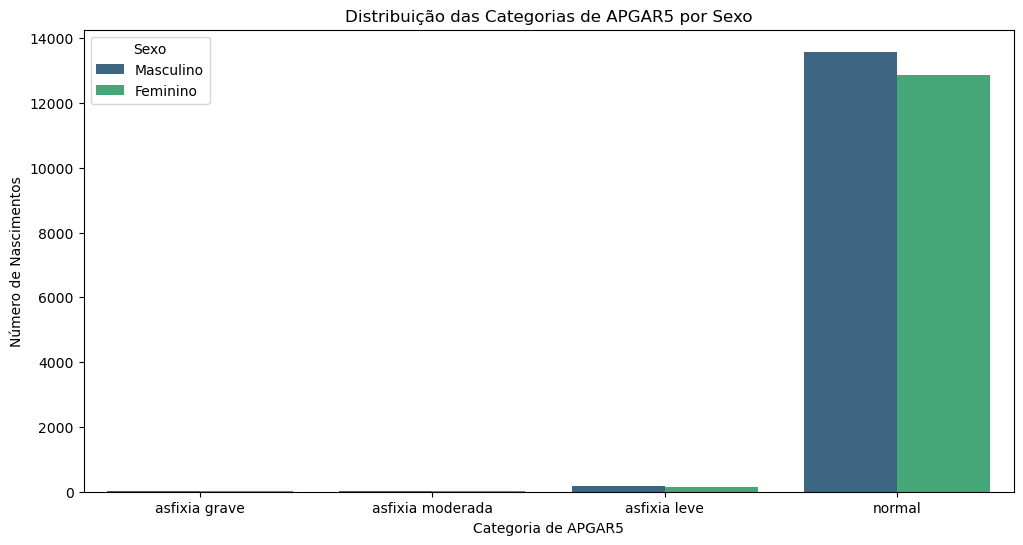

In [16]:
#Criando um gráfico de barras para visualização:

plt.figure(figsize=(12, 6))
sns.countplot(data=sinasc, x='APGAR5_categoria', hue='SEXO', palette='viridis')# distribuindo por sexo 
plt.title('Distribuição das Categorias de APGAR5 por Sexo')
plt.xlabel('Categoria de APGAR5')
plt.ylabel('Número de Nascimentos')
plt.legend(title='Sexo')
plt.show()



#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


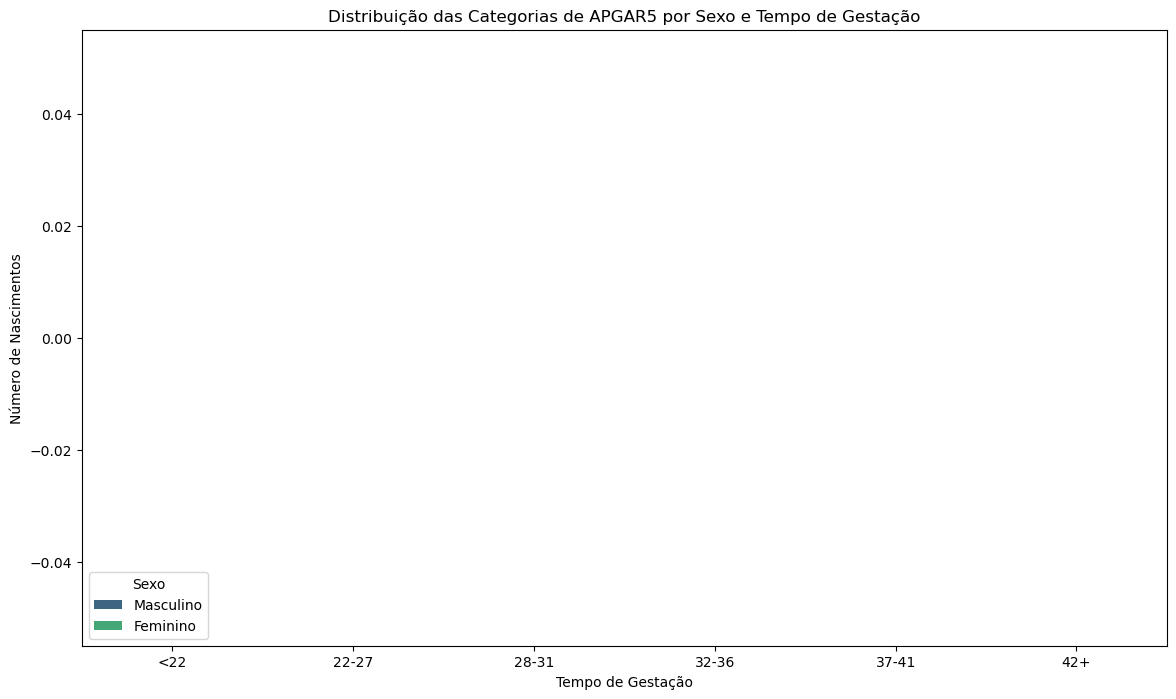

In [84]:
# Convertendo GESTACAO para categoria ordenada:
sinasc['GESTACAO'] = pd.Categorical(sinasc['GESTACAO'], categories=['<22', '22-27', '28-31', '32-36', '37-41', '42+'], ordered=True)

# Criando o gráfico de barras agrupadas:
plt.figure(figsize=(14, 8))
sns.countplot(data=sinasc, x='GESTACAO', hue='SEXO', palette='viridis')

# Adicionando rótulos e título:
plt.title('Distribuição das Categorias de APGAR5 por Sexo e Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Número de Nascimentos')
plt.legend(title='Sexo')
plt.show()


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [46]:
# Categorizando a variável APGAR5:
sinasc['APGAR5_categoria'] = pd.cut(sinasc['APGAR5'],
                                    bins=[0, 3, 5, 7, 10],
                                    labels=['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal'],
                                    right=True)

# Criando a tabela cruzada:
crosstab = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5_categoria'])

# Exibindo a tabela cruzada:
print(crosstab)


APGAR5_categoria     asfixia grave  asfixia moderada  asfixia leve  normal
GESTACAO                                                                  
22 a 27 semanas                 14                 1            12      51
28 a 31 semanas                  3                12            18     129
32 a 36 semanas                  6                19            73    2134
37 a 41 semanas                 28                28           196   22266
42 semanas e mais                0                 1             6     690
Menos de 22 semanas              1                 0             1       4


In [50]:
#Dados visualizados num DataFrame:

pd.DataFrame(crosstab)

APGAR5_categoria,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,14,1,12,51
28 a 31 semanas,3,12,18,129
32 a 36 semanas,6,19,73,2134
37 a 41 semanas,28,28,196,22266
42 semanas e mais,0,1,6,690
Menos de 22 semanas,1,0,1,4


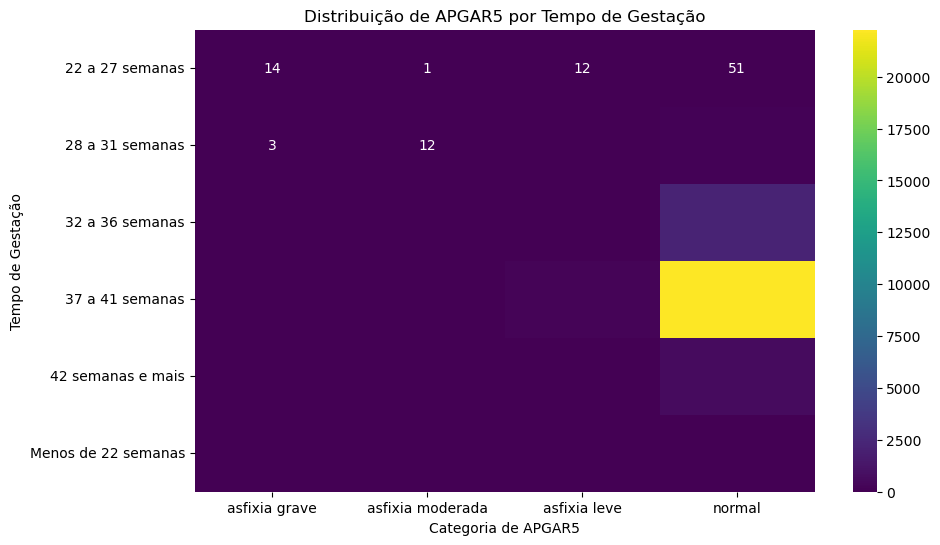

In [54]:
#Plotando a visualização:

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='viridis', fmt='d')# valores da matriz representados por cores (função heatmap).

#Os mapas de calor são uma ferramenta poderosa na visualização de dados, 
#especialmente quando se trata de identificar padrões em grandes conjuntos de dados multidimensionais.

# Adicionar rótulos e título
plt.title('Distribuição de APGAR5 por Tempo de Gestação')
plt.xlabel('Categoria de APGAR5')
plt.ylabel('Tempo de Gestação')

plt.show()



####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [72]:
# Criar a tabela cruzada
crosstab = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5_categoria'])

# Calcular os percentuais de linha
percentuais = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Exibir os percentuais de linha
print(percentuais)



APGAR5_categoria     asfixia grave  asfixia moderada  asfixia leve     normal
GESTACAO                                                                     
22 a 27 semanas          17.948718          1.282051     15.384615  65.384615
28 a 31 semanas           1.851852          7.407407     11.111111  79.629630
32 a 36 semanas           0.268817          0.851254      3.270609  95.609319
37 a 41 semanas           0.124345          0.124345      0.870415  98.880895
42 semanas e mais         0.000000          0.143472      0.860832  98.995696
Menos de 22 semanas      16.666667          0.000000     16.666667  66.666667


In [74]:
# No DataFRame:

pd.DataFrame(percentuais)

APGAR5_categoria,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,17.948718,1.282051,15.384615,65.384615
28 a 31 semanas,1.851852,7.407407,11.111111,79.629630
32 a 36 semanas,0.268817,0.851254,3.270609,95.609319
37 a 41 semanas,0.124345,0.124345,0.870415,98.880895
42 semanas e mais,0.000000,0.143472,0.860832,98.995696
Menos de 22 semanas,16.666667,0.000000,16.666667,66.666667


<Figure size 1200x600 with 0 Axes>

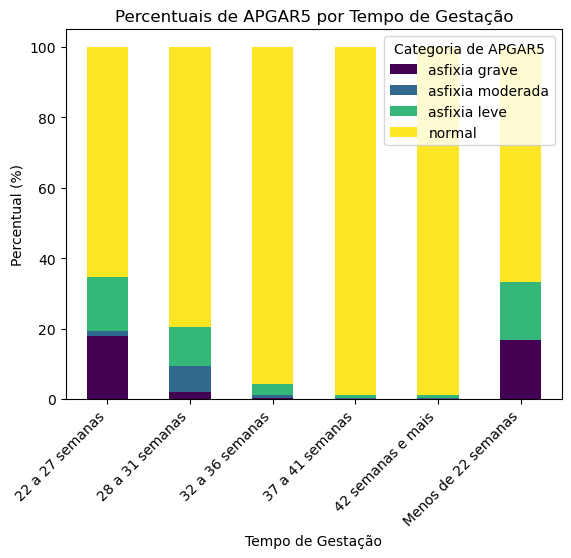

In [82]:
# Plotando o gráfico de barras empilhadas
plt.figure(figsize=(12, 6))  # Ajustar o tamanho da figura
row_perc.plot(kind='bar', stacked=True, cmap='viridis')

# Adicionar rótulos e título
plt.title('Percentuais de APGAR5 por Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)  # Manter os rótulos na horizontal
plt.legend(title='Categoria de APGAR5')

#Ajustando a rotação para o eixo tempo de gestação:
plt.xticks(rotation=45, ha='right')

#Visualização dos dados:
plt.show()



####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

ORIGEM                 int64
CODESTAB             float64
CODMUNNASC             int64
LOCNASC                int64
IDADEMAE               int64
                      ...   
munResLat            float64
munResLon            float64
munResAlt            float64
munResArea           float64
APGAR5_categoria    category
Length: 70, dtype: object


<Figure size 1000x600 with 0 Axes>

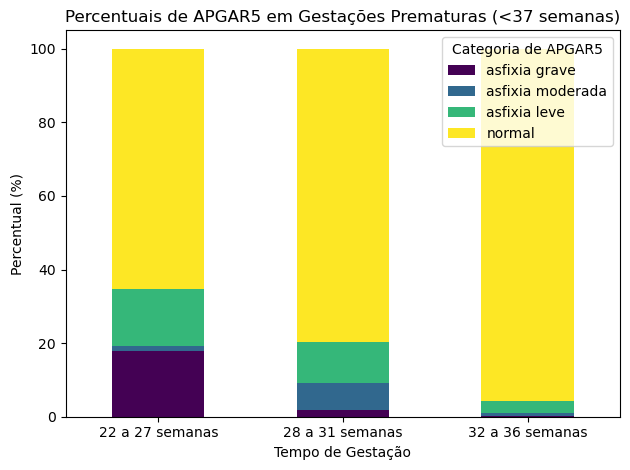

In [105]:
# Verificando os tipos de dados:
print(sinasc.dtypes)

# Filtrar apenas as gestações prematuras (menos de 37 semanas):
prematuros = sinasc[sinasc['GESTACAO'] < '37']

# Criar a tabela cruzada para prematuros:
crosstab_prematuros = pd.crosstab(prematuros['GESTACAO'], prematuros['APGAR5_categoria'])

# Calcular os percentuais de linha:
row_perc_prematuros = crosstab_prematuros.div(crosstab_prematuros.sum(axis=1), axis=0) * 100

# Plotar o gráfico de barras:
plt.figure(figsize=(10, 6))
row_perc_prematuros.plot(kind='bar', stacked=True, cmap='viridis')

# Adicionar rótulos e título:
plt.title('Percentuais de APGAR5 em Gestações Prematuras (<37 semanas)')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)
plt.legend(title='Categoria de APGAR5')

plt.tight_layout()

plt.show()



Análise e interpretação dos dados:

Considerando os percentuais de APGAR5, verificamos um índice maior de categoria normal, ou seja, entre, 8e 10, com um número de nascimento estimado em 2134. entendemos que foge da categoria prematuro.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

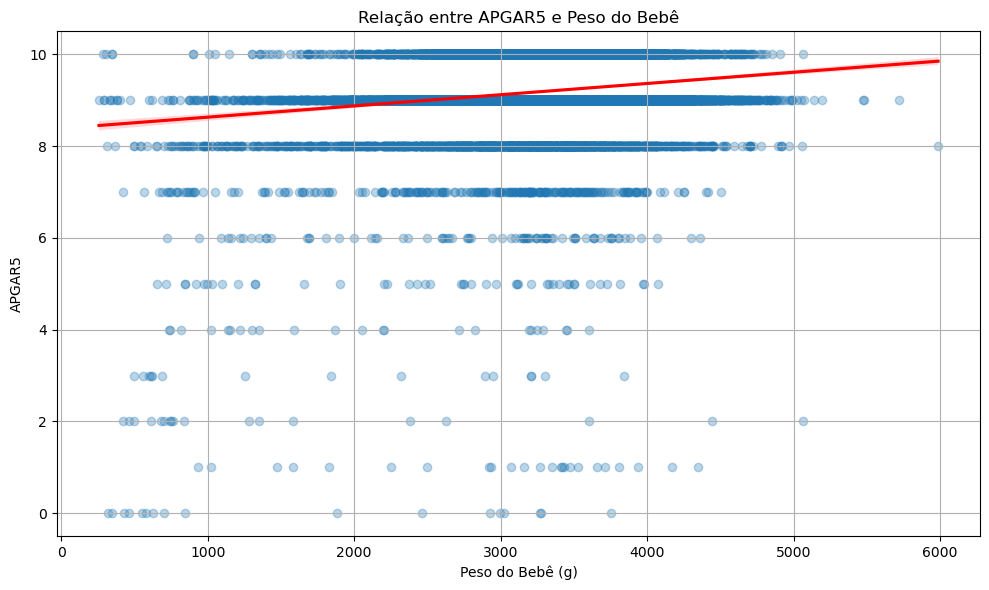

In [111]:
# Limpando os dados com APGAR5 inválido (menor que 0 ou maior que 10):
sinasc = sinasc[(sinasc['APGAR5'] >= 0) & (sinasc['APGAR5'] <= 10)]

# Scatter plot com regressão linear: para visualizar a tendência geral entre APGAR5 e o peso do bebê. 
# A transparência (alpha=0.3) nos pontos de dispersão ajuda a visualizar melhor a densidade de dados.

plt.figure(figsize=(10, 6))
sns.regplot(x='PESO', y='APGAR5', data=sinasc, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})

# Adicionando rótulos e título:
plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.xlabel('Peso do Bebê (g)')
plt.ylabel('APGAR5')

plt.grid(True)
plt.tight_layout()

plt.show()



Podemos visualizar a relação entre peso e APAGAR5, em que quanto mais pesado o bebê, mais próximo da categoria normal ele se encontra.